Unsupervised learning (UL), at its core, is learning the structure of the data without being given target variables. In a way, unsupervised learning is a more fundamental and more difficult problem than supervised learning which grabs more headlines. Here are some areas where we find unsupervised learning:

1) It is hard to visualize high dimensional data. Unsupervised learning can help us visualize each sample in 3D or even 2D. (PCA, embeddings)

2) Organizations can discover different patterns in their data that their original goals may have overlooked.

3) Labeled training data is hard to come by. On the other hand, unlabeled data could be gathered significantly easier. There is a hybrid methodology called semi-supervised learning, where a combination of unlabeled and labeled data is used.

We will start with an algorithm to ease us into UL.

# K-Means algorithm
The k-means algorithm divides a set of $M$ samples $X$ into $K$ disjoint clusters $C$, each described by the mean $\mu_j$ of the samples in the cluster. The means are commonly called the cluster “centroids”; note that they are not, in general, points from X, although they live in the same space. The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum of squared criterion:

$$
\text{inertia} = \sum_{i=0}^{m}\min_{\mu_j \in C}(D(x_i, \mu_j))\\
D(x, \mu) = ||x - \mu||^2
$$

The K-means algorithm could use any defined pairwise distance measurement. (Credits to Wittenauer for K-means code)
http://nbviewer.jupyter.org/github/jdwittenauer/ipython-notebooks/blob/master/ML-Exercise7.ipynb

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline

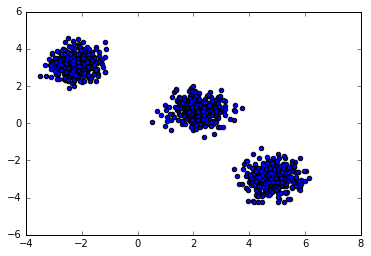

In [5]:
X, y = datasets.make_blobs(n_samples=1000, centers=3, cluster_std=0.5, center_box=(-5,5))
plt.scatter(X[:,0], X[:,1])

For each sample, find out the closest defined centroid. We do the following code.

In [7]:
def find_closest_centroids(X, centroids, dist_func=None):
    m = X.shape[0]
    k = centroids.shape[0]
    closest_centroid = np.zeros(m)
    
    for i in range(m):
        min_dist = np.Inf
        for j in range(k):
            if not dist_func:
                dist = euclidean_distance(X[i,:], centroids[j,:])
            else:
                dist = dist_func(X[i,:], centroids[j,:])
            if dist < min_dist:
                min_dist = dist
                closest_centroid[i] = j
    
    return closest_centroid

def euclidean_distance(Xi, centroids):
    '''
    For each sample Xi, compute its distance to a centroid
    '''
    dist = np.sqrt(np.sum((Xi - centroids) ** 2))
    return dist

In [9]:
initial_centroids = np.array([[3, 0], [0, -5],[3, 2]])

candidate_grouping = find_closest_centroids(X, initial_centroids)
candidate_grouping

array([ 0.,  2.,  2.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  2.,  2.,  0.,
        2.,  0.,  2.,  2.,  2.,  0.,  0.,  2.,  0.,  0.,  0.,  2.,  2.,
        0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  2.,  2.,  0.,  0.,  0.,
        0.,  2.,  0.,  2.,  0.,  0.,  0.,  2.,  0.,  2.,  2.,  2.,  2.,
        0.,  0.,  0.,  2.,  2.,  0.,  0.,  2.,  2.,  0.,  0.,  0.,  0.,
        0.,  0.,  2.,  0.,  0.,  2.,  0.,  2.,  2.,  0.,  0.,  0.,  2.,
        2.,  2.,  2.,  0.,  2.,  0.,  2.,  2.,  2.,  0.,  0.,  0.,  0.,
        0.,  2.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        2.,  2.,  0.,  0.,  2.,  0.,  0.,  2.,  2.,  0.,  2.,  0.,  2.,
        2.,  2.,  0.,  2.,  2.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  2.,
        2.,  2.,  0.,  2.,  2.,  2.,  0.,  2.,  0.,  0.,  0.,  2.,  2.,
        0.,  2.,  0.,  0.,  0.,  2.,  2.,  0.,  2.,  0.,  0.,  0.,  2.,
        0.,  0.,  0.,  0.,  0.,  2.,  2.,  2.,  2.,  2.,  0.,  2.,  0.,
        2.,  0.,  2.,  0.,  0.,  0.,  2.,  2.,  0.,  0.,  0.,  2

We then do the code to compute the cluster centroids.

In [13]:
def compute_centroids(X, candidate_grouping, k):
    m, n = X.shape
    centroids = np.zeros((k, n))
    
    for i in range(k):
        indices = np.where(candidate_grouping == i)
        centroids[i,:] = (np.sum(X[indices,:], axis=1) / len(indices[0])).ravel()
    
    return centroids

In [14]:
centers = compute_centroids(X, candidate_grouping, 3)
centers

array([[ 3.68896385, -1.46714319],
       [ 4.14237378, -4.21795717],
       [-1.29594804,  2.80218513]])

We can then reinput this again to find_closest_centroids. We iterate until a set criteria is matched, for example:

1) Maximum iterations

2) If the centroids do not move for some threshold $t$

3) Minimum inertia $I$ reached.

For example:

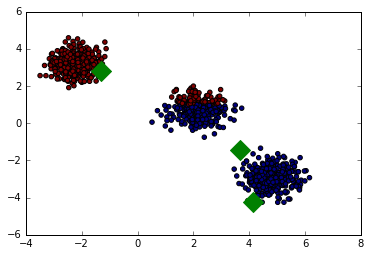

In [15]:
plt.scatter(X[:,0], X[:,1], c=candidate_grouping)
plt.scatter(centers[:,0],centers[:,1], s=200, color="green", marker="D")

In [16]:
def do_k_means_with_n_steps(X, initial_centers, n, dist_func=None):
    fig, axes = plt.subplots(n,1,figsize=(20,20))
    candidate_groups = find_closest_centroids(
        X, initial_centers, dist_func=dist_func)
    candidate_centers = initial_centers
    
    axes[0].scatter(X[:,0], X[:,1], c=candidate_groups)
    axes[0].scatter(candidate_centers[:,0], candidate_centers[:,1], s=200, color="green", marker="D")
    axes[0].set_title("Centers: {}".format(candidate_centers))
    
    for i in range(1,n):
        candidate_groups = find_closest_centroids(X, candidate_centers)
        candidate_centers = compute_centroids(X, candidate_groups, 3)

        axes[i].scatter(X[:,0], X[:,1], c=candidate_groups)
        axes[i].scatter(candidate_centers[:,0], candidate_centers[:,1], s=200, color="green", marker="D")
        axes[i].set_title("Centers: {} {} {}".format(candidate_centers[0], 
                                                     candidate_centers[1], candidate_centers[2]))

In [17]:
initial_centroids = np.random.randint(
    min(X.flatten()), max(X.flatten()), size=6).reshape(3,2)
initial_centroids

array([[-3, -2],
       [ 3,  4],
       [ 5,  3]])

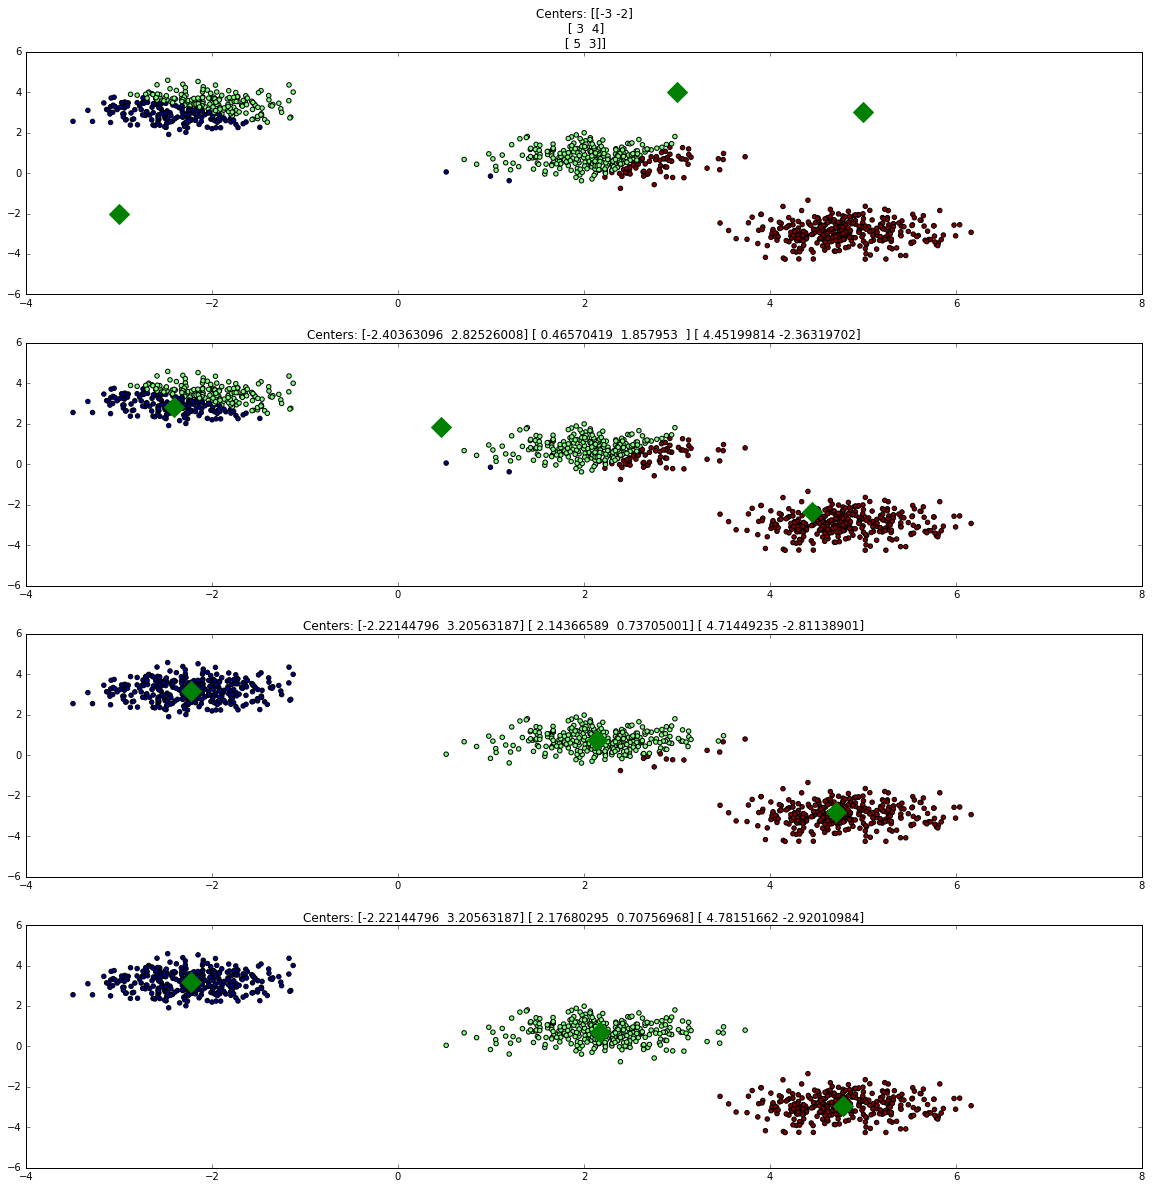

In [18]:
do_k_means_with_n_steps(X, initial_centroids, 4)

## And as always, the sklearn counterpart

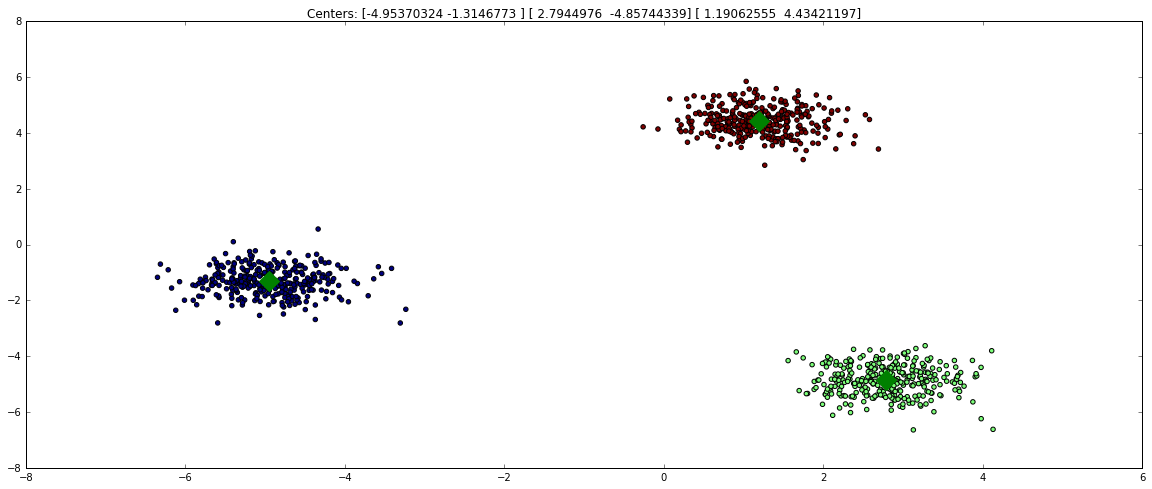

In [220]:
from sklearn import cluster
cl = cluster.KMeans(n_clusters=3)
cl.fit(X)

plt.figure(figsize=(20,8))
plt.scatter(X[:,0], X[:,1], 
            c=cl.predict(X))
plt.scatter(cl.cluster_centers_[:,0], 
            cl.cluster_centers_[:,1], s=200, color="green", marker="D")
plt.title("Centers: {} {} {}".format(
        cl.cluster_centers_[0], cl.cluster_centers_[1],cl.cluster_centers_[2]))

Isn't that a good start? Unfortunately, here are some weaknesses of the K-Means algorithm:

1) Needs to specify K. There are some heuristics for this, as we'll get to in a moment.

2) K-Means will converge, although provided it is given a good set of initial centroids.

3) In high dimensions, K-means using Euclidean distance will become less meaningful. Feature transformations such as PCA will help with this.

4) Datasets with elongated or irregular shapes will give unexpected outcomes. Consider:

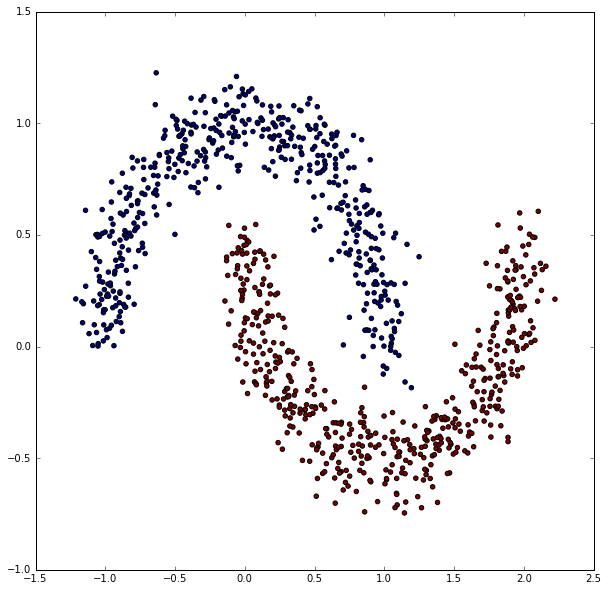

In [19]:
plt.figure(figsize=(10,10))
X,y = datasets.make_moons(n_samples=1000,noise=0.1)
plt.scatter(X[:,0], X[:,1], c=y, )

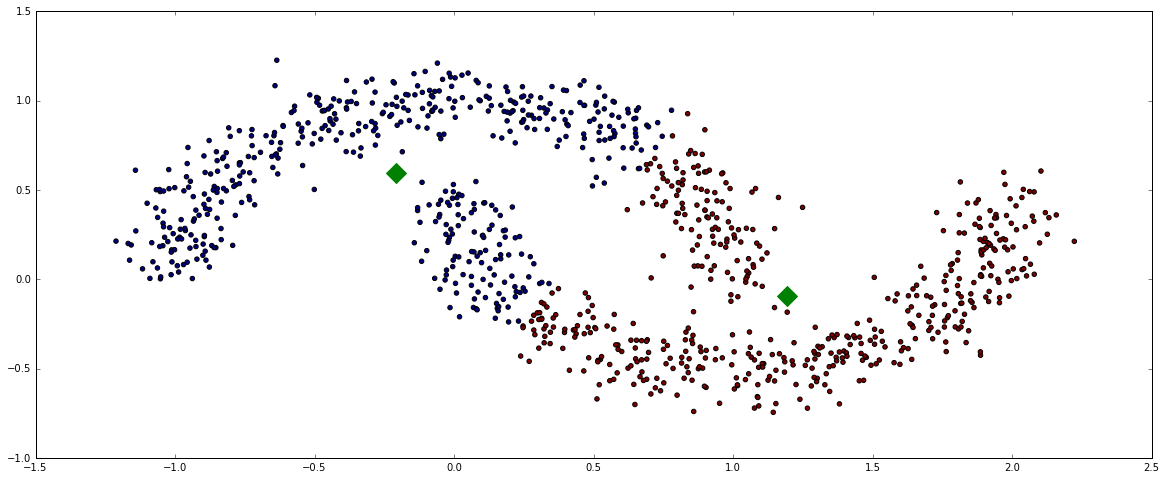

In [20]:
from sklearn import cluster
cl = cluster.KMeans(n_clusters=2)
cl.fit(X)

plt.figure(figsize=(20,8))
plt.scatter(X[:,0], X[:,1], c=cl.predict(X))
plt.scatter(cl.cluster_centers_[:,0], cl.cluster_centers_[:,1], 
            s=200, color="green", marker="D")

In [29]:
cl.cluster_centers_

array([[-0.20851303,  0.59440813],
       [ 1.19161699, -0.09470695]])

This is due to the fact that the Euclidean distance presupposes spherical data, which is not the case for most datasets. Let's try out the cosine distance using K-means.<b> Although the K-means algorithm is designed for the Euclidean distance, other measures may work provided some special mathematical properties</b>. We'll come back to using other distance measures with another algorithm later.

# Evaluation cluster health
Clustering also has its metrics. For k-means, it's the inertia. Generalizing this idea, we can define a <b>intra-cluster distance</b> that we would like to minimize and an <b>inter-cluster distance</b> to maximize, just like in supervised learning's error and accuracy, respectively. 

An implementation of intra-cluster and inter-cluster distance could be the pairwise distance of all samples against all others. For 

Unlike supervised learning however, we may not have a target variable, thus a training set, test set division may not be required. For this example, we'll evaluate the entire dataset at once (putting aside of course that we do have labels for these!)

Let's try it out:

In [21]:
from sklearn.metrics import pairwise_distances
# get predicted class 0 and get their average distance to each other
def average_euclidean_distance(X, cl, cat):
    distances = pairwise_distances(X[np.where(cl.predict(X)==cat)], metric='euclidean')
    uti = np.triu_indices(distances.shape[0])
    return np.mean(distances[uti])

In [22]:
from scipy.stats import hmean
print("Class 0: {}".format(average_euclidean_distance(X,cl,0)))
print("Class 1: {}".format(average_euclidean_distance(X,cl,1)))
print("Average of both: {}".format(
    hmean((average_euclidean_distance(X,cl,0),average_euclidean_distance(X,cl,1)))
    ))

Class 0: 0.801612358727
Class 1: 0.806483842714
Average of both: 0.804040722009


Good. A single number. This single number also helps us in determining the number $k$.

## Board game data clustering
Let's try live datasets now, beginning with our board games. We'll just get grab some code from Week 1...

In [23]:
board_data = pd.read_csv('data/games.csv')
board_data = board_data[\
            board_data["average_rating"] > 0]

# adding duration from the homework
board_data['duration'] = np.where(board_data['maxplaytime'] == board_data['minplaytime'], 
                                   board_data['maxplaytime'],board_data['maxplaytime']-board_data['minplaytime'])
less_than_30_mins = (board_data['duration'] <=30) &  (board_data['duration'] > 0)
one_hour = (board_data['duration'] <=60) & (board_data['duration'] >30)
two_hours = (board_data['duration'] <=120) & (board_data['duration'] >60)
more_than_two_hours = board_data['duration'] > 120
board_data['duration'] = None
board_data.loc[less_than_30_mins,'duration'] = 'Less than 30 minutes'
board_data.loc[one_hour,'duration'] = 'One hour'
board_data.loc[two_hours,'duration'] = 'Two hours'
board_data.loc[more_than_two_hours,'duration'] = 'More than two hours'

numeric_columns = [key for key in dict(board_data.dtypes) 
                   if dict(board_data.dtypes)[key] in ['float64', 'int64','float32','int32']]

# column names
column_names = []

# numeric data 
board_data_num = board_data[numeric_columns]
# remove ID since that won't help
board_data_num= board_data_num.drop(["id"], axis=1)
# save column names
column_names.extend(board_data_num.columns.tolist())
board_data_num = np.float32(board_data_num.as_matrix())

#categorical data (duration and type)
board_data_cat  = board_data.drop(numeric_columns,axis=1)
# we drop the name (since that won't help in predicting the target)
board_data_cat = board_data_cat.drop(["name"],axis=1)
# save column names
column_names.extend(board_data_cat.columns.tolist())
board_data_cat=board_data_cat.T.to_dict().values()

# vectorizer for categorical data transformation
from sklearn import feature_extraction
vectorizer = feature_extraction.DictVectorizer(sparse=False)
board_data_cat = vectorizer.fit_transform(board_data_cat)

from sklearn import utils
# combine!
board_data_mat = np.hstack((board_data_num, board_data_cat))
# remove nans
where_are_NaNs = np.isnan(board_data_mat)
board_data_mat[where_are_NaNs] = -1

# shuffle along with the target variable
y = board_data["average_rating"].tolist()
board_data_mat, y_board = utils.shuffle(board_data_mat, y)

In [25]:
board_data_mat.shape

(56932, 24)

### Determining optimal k
We can automatically determine k by using an elbow method with respect to the cluster health. We want to minimize intra-class distance, so our elbow should slope downwards, with the maximum jump to be our optimal $k$.

In [329]:
from scipy.stats import hmean
for k in range(2,10):
    kmeans = cluster.KMeans(n_clusters=k)
    kmeans.fit(board_data_mat)
    distances = [average_euclidean_distance(
            board_data_mat,kmeans,j) for j in range(k)]
    print distances

MemoryError: 

In [38]:
from sklearn.metrics import pairwise_distances
from sklearn import utils
# get predicted class 0 and get their average distance to each other
def average_euclidean_distance2(X, cl, cat, samples=None):
    tot=0
    if not samples:
        data = X[np.where(cl.predict(X)==cat)]
    else:
        X = utils.shuffle(X)
        data = X[np.where(cl.predict(X)==cat)][:samples]
    for i in xrange(data.shape[0]-1):
        tot += ((((data[i+1:]-data[i])**2).sum(1))**.5).sum()
    avg = tot/((data.shape[0]-1)*(data.shape[0])/2.)
    return avg

In [39]:
print("Class 0: {}".format(average_euclidean_distance2(X,cl,0)))
print("Class 1: {}".format(average_euclidean_distance2(X,cl,1)))
print("Average of both: {}".format(
    hmean((average_euclidean_distance(X,cl,0),average_euclidean_distance(X,cl,1)))
    ))

Class 0: 0.804857752892
Class 1: 0.809684175424
Average of both: 0.804040722009


In [343]:
from scipy.stats import hmean
all_dist = []
for k in range(2,10):
    kmeans = cluster.KMeans(n_clusters=k)
    kmeans.fit(board_data_mat)
    distances = [average_euclidean_distance2(board_data_mat,kmeans,j,samples=10000) for j in range(k)]
    all_dist.append(hmean(distances))

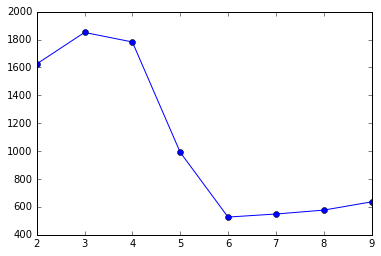

In [388]:
from IPython.display import display, Image
display(Image("images/k_means_elbow.png"))

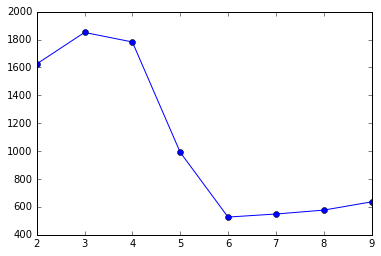

In [344]:
plt.plot(range(2,10),all_dist, marker="o")
plt.xticks(range(2,10))
plt.show()

In this example, it seems 5 is the optimum. What are the cluster centroids? Well, it will be quite the task to decipher it again given we've done some preprocessing. Now we reverse all of that. Good thing we saved the column indices!

In [40]:
from sklearn import cluster
kmeans = cluster.KMeans(n_clusters=5)
kmeans.fit(board_data_mat)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=5, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [7]:
column_names

['total_wishers',
 'minage',
 'total_wanters',
 'playingtime',
 'minplayers',
 'yearpublished',
 'bayes_average_rating',
 'maxplayers',
 'total_traders',
 'users_rated',
 'average_rating',
 'total_comments',
 'total_weights',
 'average_weight',
 'maxplaytime',
 'minplaytime',
 'total_owners',
 'type',
 'duration']

In [41]:
column_names[17] = "Board game"
column_names[18] = "Board game expansion"
column_names.append("Invalid duration")
column_names.append("Less than 30 min")
column_names.append("One hour")
column_names.append("Two hours")
column_names.append("More than two hours")

In [42]:
for i in enumerate(column_names):
    print i

(0, 'total_wishers')
(1, 'minage')
(2, 'total_wanters')
(3, 'playingtime')
(4, 'minplayers')
(5, 'yearpublished')
(6, 'bayes_average_rating')
(7, 'maxplayers')
(8, 'total_traders')
(9, 'users_rated')
(10, 'average_rating')
(11, 'total_comments')
(12, 'total_weights')
(13, 'average_weight')
(14, 'maxplaytime')
(15, 'minplaytime')
(16, 'total_owners')
(17, 'Board game')
(18, 'Board game expansion')
(19, 'Invalid duration')
(20, 'Less than 30 min')
(21, 'One hour')
(22, 'Two hours')
(23, 'More than two hours')


In [43]:
all_dist = []
for c in range(5):
    print
    print("== CLUSTER {} ==".format(c))
    print
    for (i, name) in enumerate(column_names):
        print("{} : {}".format(name, kmeans.cluster_centers_[c][i]))
    
    ave_distance = average_euclidean_distance2(board_data_mat, kmeans, c, samples=5000)
    print("== Health {} ==".format(ave_distance))
    all_dist.append(ave_distance)

print
print("Overall average health: {}".format(np.mean(all_dist)))


== CLUSTER 0 ==

total_wishers : 25.4147135298
minage : 7.48102623779
total_wanters : 8.88026619633
playingtime : 56.6043238722
minplayers : 2.00185464662
yearpublished : 1870.6362347
bayes_average_rating : 1.47298885848
maxplayers : 5.58308635016
total_traders : 7.18111897012
users_rated : 68.5646126154
average_rating : 5.97684589843
total_comments : 26.8639198502
total_weights : 7.86604723895
average_weight : 1.22929554163
maxplaytime : 56.6043238722
minplaytime : 54.8216993654
total_owners : 151.636816553
Board game : -0.176500536393
Board game expansion : 0.410822408495
Invalid duration : 0.0684400967325
Less than 30 min : 0.214575340473
One hour : 0.129661617906
Two hours : 0.842991435897
More than two hours : 0.157008564103
== Health 598.397304957 ==

== CLUSTER 1 ==

total_wishers : 2291.5704698
minage : 10.8590604027
total_wanters : 522.966442953
playingtime : 82.3993288591
minplayers : 2.07718120805
yearpublished : 1938.32550336
bayes_average_rating : 7.18541183088
maxplayers

## Q: Load up the speeches dataset. Vectorize it using CountVectorizer. Compute cluster health for k=2...7. Can you see anything?

# Hierarchical clustering
Hierarchical clustering is a general family of clustering algorithms that build nested clusters by merging or splitting them successively. This hierarchy of clusters is represented as a tree (or dendrogram). The root of the tree is the unique cluster that gathers all the samples, the leaves being the clusters with only one sample. (sklearn)

We'll tackle Ward clustering here which minimizes an objective similar to k-means, the sum of squared differences. We also add in another constraint, that <b>each sample to be grouped together, is required to be connected to 10 other samples of the same candidate cluster</b>.

For complete tutorial, refer to http://scikit-learn.org/stable/auto_examples/cluster/plot_ward_structured_vs_unstructured.html#example-cluster-plot-ward-structured-vs-unstructured-py

In [44]:
from sklearn import cluster
from sklearn.neighbors import kneighbors_graph
import itertools
knn_graph = kneighbors_graph(
    board_data_mat, 10, include_self=False)
ward = cluster.AgglomerativeClustering(
    linkage='ward', affinity='euclidean', connectivity=knn_graph)
ward.fit(board_data_mat)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=<56932x56932 sparse matrix of type '<type 'numpy.float64'>'
	with 569320 stored elements in Compressed Sparse Row format>,
            linkage='ward', memory=Memory(cachedir=None), n_clusters=2,
            pooling_func=<function mean at 0x7fc594264b18>)

Unfortunately, we cannot see the dendrogram using sklearn's implementation by design since visualizing this for a large dataset won't scale. We can however, simply use a smaller sample set and use scipy's dendrogram and distance functions.

In [49]:
from sklearn.utils import shuffle
board_data_mat_sample,sample_names = shuffle(
    board_data_mat,board_data['name'].tolist())
board_data_mat_sample = board_data_mat_sample[:100]
samples_names = sample_names[:100]

In [50]:
from sklearn.metrics.pairwise import euclidean_distances
dist = euclidean_distances(board_data_mat_sample)

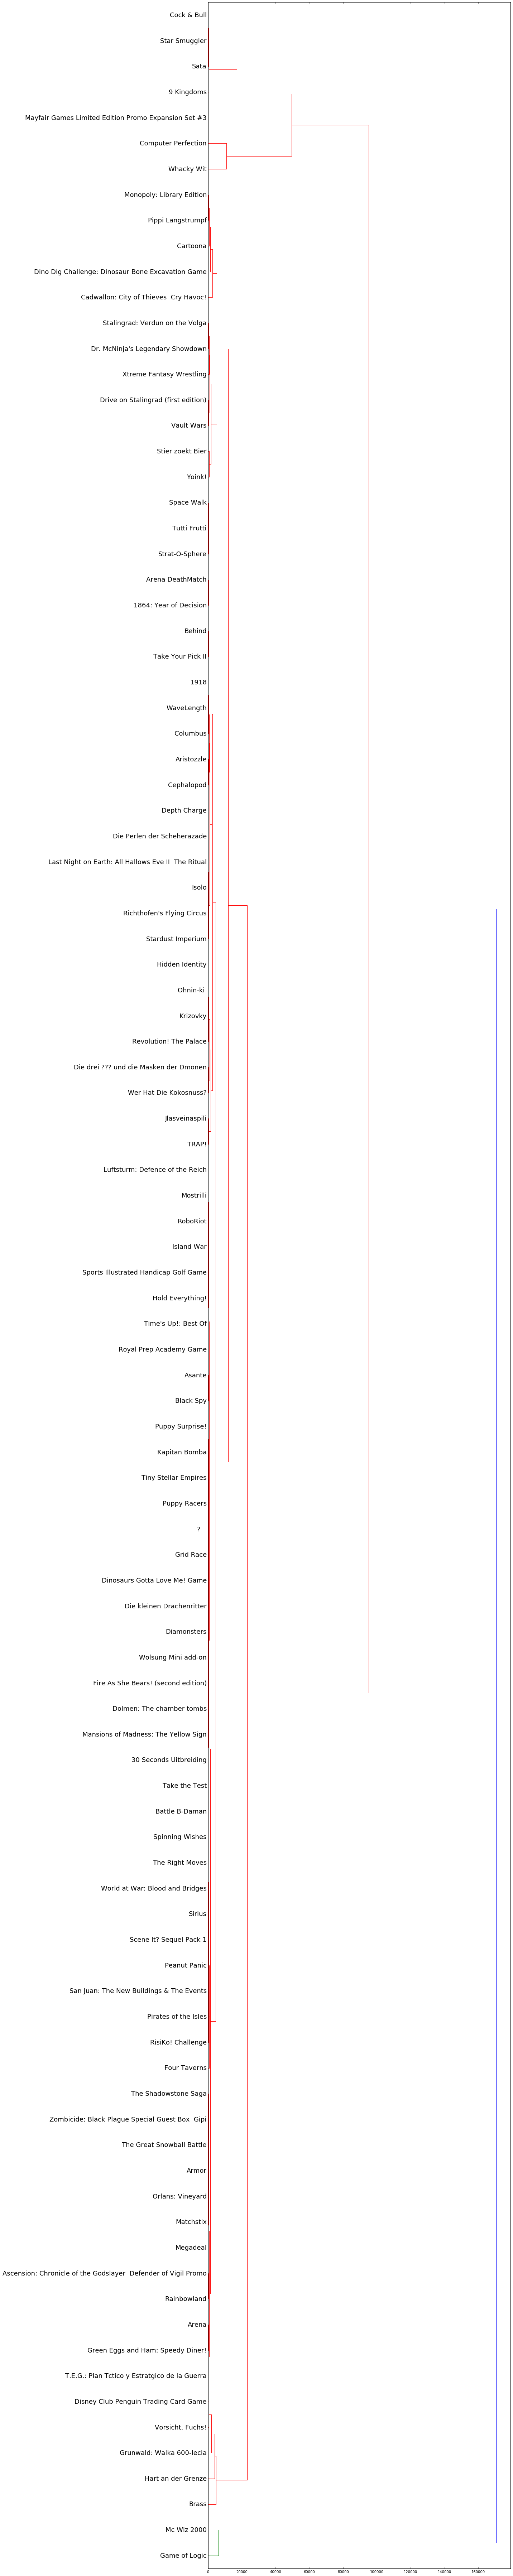

In [51]:
from scipy.cluster.hierarchy import ward, dendrogram
linkage_matrix = ward(dist)

plt.figure(figsize=(20,100))
dendrogram(linkage_matrix, orientation="right", 
           labels=samples_names, leaf_font_size=18)

plt.tight_layout()
plt.show()

We can also visualize the 5 earlier discovered clusters in k-means and see how they can be divided.

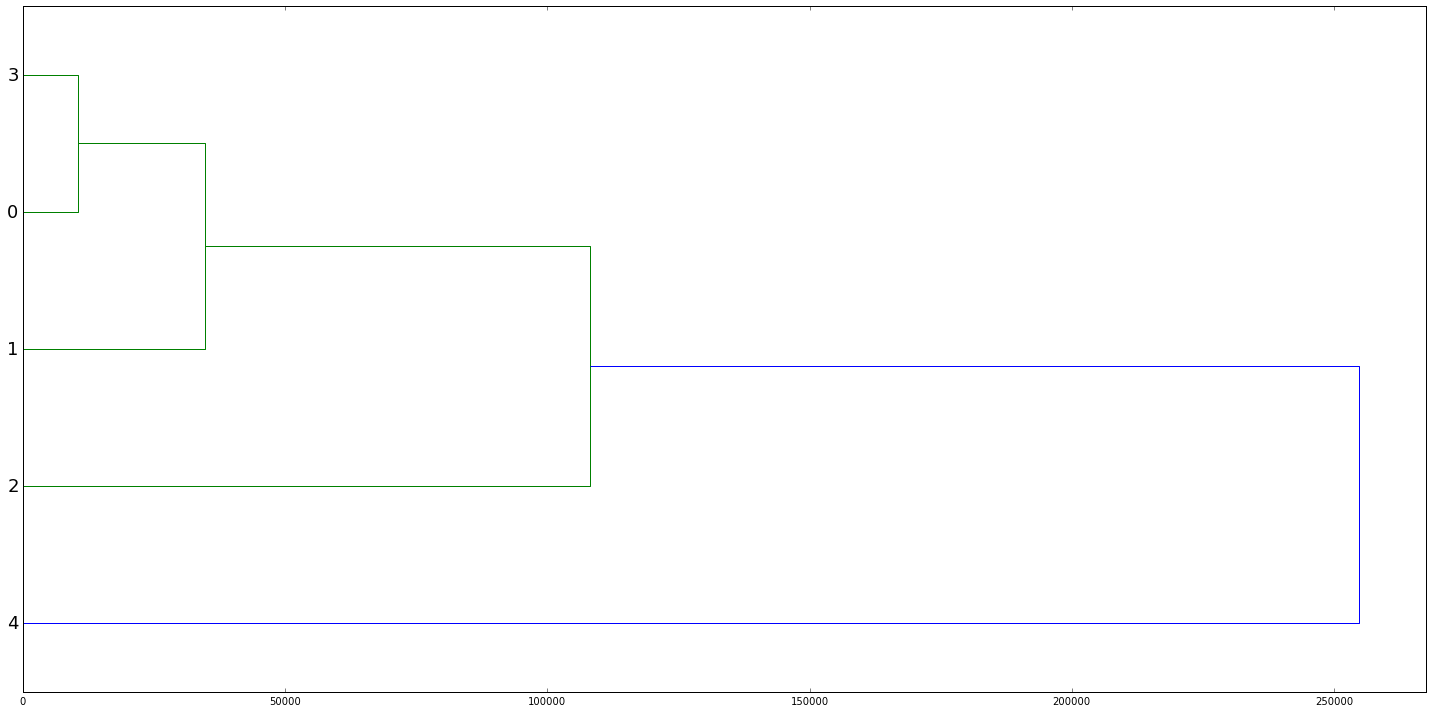

In [52]:
# TODO
cluster_distances = euclidean_distances(kmeans.cluster_centers_)
linkage_matrix = ward(cluster_distances)

plt.figure(figsize=(20,10))
dendrogram(linkage_matrix, orientation="right", labels=range(5), leaf_font_size=18)

plt.tight_layout()
plt.show()

# Distance metrics
Distance describes how much far apart objects are in some space. In Euclidean space, it is the form:

$$
\begin{align}
\text{1-norm distance} 	&= \sum_{i=1}^n \left| x_i - y_i \right|\\
\text{2-norm distance} 	&= \left( \sum_{i=1}^n \left| x_i - y_i \right|^2 \right)^{1/2}\\
\text{p-norm distance} 	&= \left( \sum_{i=1}^n \left| x_i - y_i \right|^p \right)^{1/p}\\
\text{infinity norm distance} 	&= \lim_{p \to \infty} \left( \sum_{i=1}^n \left| x_i - y_i \right|^p \right)^{1/p}\\
	&= \max \left(|x_1 - y_1|, |x_2 - y_2|, \ldots, |x_n - y_n| \right).    
\end{align}
$$

There are other distance metrics. I'll describe the cosine similarity, which is often used in high-dimensional data, particularly NLP:

$$
cos(u,v) = 1 - \frac{u \cdot v}
         {||u||_2 ||v||_2}.
$$

The term $||u||_2$ is the Euclidean norm (2-norm). It looks like this:

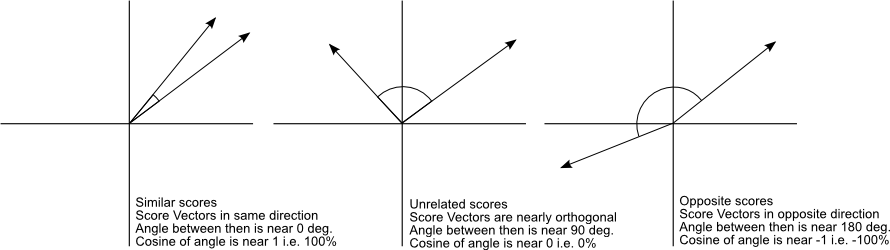

In [29]:
from IPython.display import display, Image
display(Image("http://blog.christianperone.com/wp-content/uploads/2013/09/cosinesimilarityfq1.png"))

Here are some more that I've encountered:

1) For strings of 1's and 0's, use the <b>Hamming distance</b>.

2) An alternative is to use the <b>Jaccard similarity</b>

3) For string sequences, use the <b>Levenshtein distance</b>.

For a complete list of already available distance metrics, see http://docs.scipy.org/doc/scipy/reference/spatial.distance.html.

# Density-Based Spatial Clustering of Applications with Noise (DBSCAN)
The DBSCAN algorithm views clusters as areas of high density separated by areas of low density. The central component to the DBSCAN is the concept of core samples, which are samples that are in areas of high density. A cluster is therefore a set of core samples, each close to each other (measured by some distance measure) and a set of non-core samples that are close to a core sample (but are not themselves core samples). (sklearn)

Two hyperparameters are used to adjust DBSCAN. $eps$ is the maximum distance between two samples to be considered to be in the same neighborhood. $\text{min_samples}$ is the number of samples in a neighborhood to be considered as a core point.

The higher the min_samples and lower eps, the higher the density is required to form a cluster.

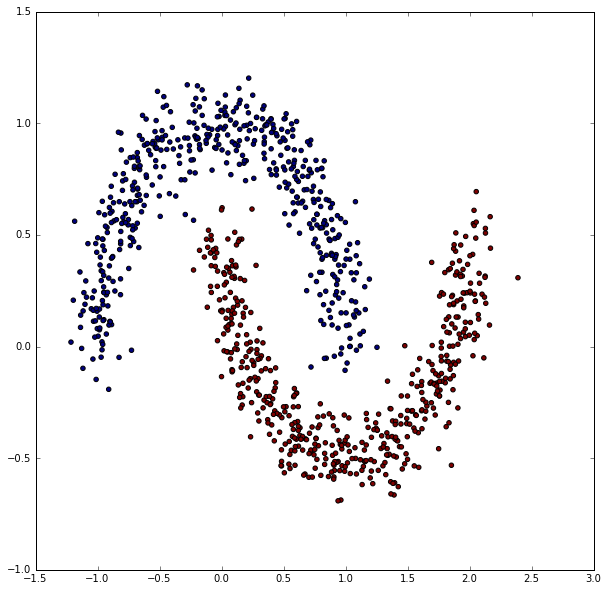

In [53]:
plt.figure(figsize=(10,10))
X,y = datasets.make_moons(n_samples=1000,noise=0.1)
plt.scatter(X[:,0], X[:,1], c=y, )

In [54]:
def average_euclidean_distance3(X, labels, cat, samples=None):
    tot=0
    if not samples:
        data = X[np.where(labels==cat)]
    else:
        X = utils.shuffle(X)
        data = X[np.where(labels==cat)][:samples]
    for i in xrange(data.shape[0]-1):
        tot += ((((data[i+1:]-data[i])**2).sum(1))**.5).sum()
    avg = tot/((data.shape[0]-1)*(data.shape[0])/2.)
    return avg

In [55]:
from sklearn.cluster import DBSCAN

def show_clusters(X, y, eps, min_samples):
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_
    
    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    # Black removed and is used for noise instead.
    unique_labels = set(labels)
    colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = 'k'

        class_member_mask = (labels == k)

        xy = X[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
                 markeredgecolor='k', markersize=14)

        xy = X[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
                 markeredgecolor='k', markersize=6)
    plt.title('Estimated number of clusters: %d' % n_clusters_)
    plt.show()
    # print cluster health, remove -1's (outliers)
    for cat in range(len(unique_labels)-1):
        print("Cluster {}'s health: {}, members: {}").format(
            cat, average_euclidean_distance3(X, db.labels_, cat), 
            len(np.where(db.labels_==cat)[0]))
    return db

/usr/local/lib/python2.7/dist-packages/matplotlib/lines.py:1106: UnicodeWarning: Unicode unequal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if self._markerfacecolor != fc:


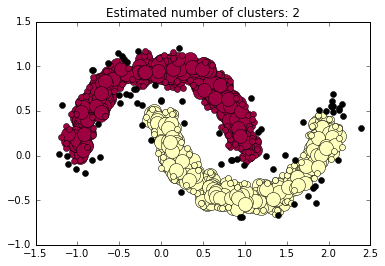

Cluster 0's health: 0.941650070503, members: 463
Cluster 1's health: 0.920808038482, members: 466


DBSCAN(algorithm='auto', eps=0.1, leaf_size=30, metric='euclidean',
    min_samples=10, n_jobs=1, p=None)

In [56]:
show_clusters(X,y, 0.1, 10)

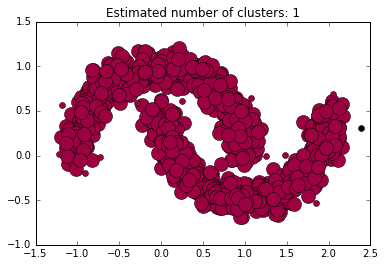

Cluster 0's health: 1.24653159434, members: 999


DBSCAN(algorithm='auto', eps=0.2, leaf_size=30, metric='euclidean',
    min_samples=10, n_jobs=1, p=None)

In [57]:
show_clusters(X,y, 0.2, 10)

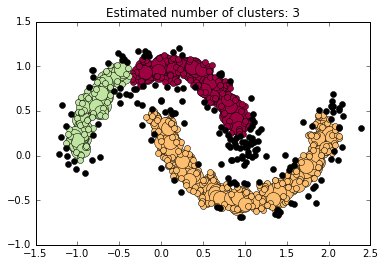

Cluster 0's health: 0.537503923268, members: 236
Cluster 1's health: 0.912313091838, members: 431
Cluster 2's health: 0.406065509783, members: 160


DBSCAN(algorithm='auto', eps=0.1, leaf_size=30, metric='euclidean',
    min_samples=15, n_jobs=1, p=None)

In [58]:
show_clusters(X,y, 0.1, 15)

# Cluster metrics with ground truth

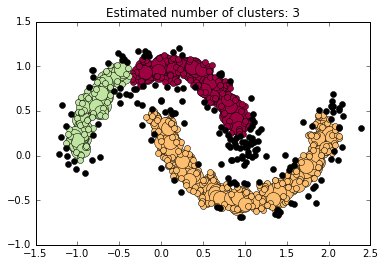

Cluster 0's health: 0.537503923268, members: 236
Cluster 1's health: 0.912313091838, members: 431
Cluster 2's health: 0.406065509783, members: 160


In [60]:
db = show_clusters(X,y, 0.1, 15)

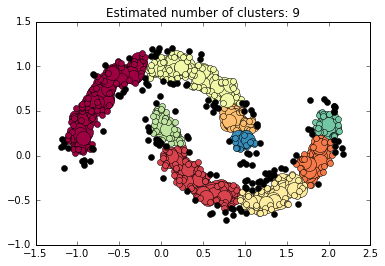

Cluster 0's health: 0.46561309122, members: 198
Cluster 1's health: 0.370139161116, members: 153
Cluster 2's health: 0.205232985011, members: 74
Cluster 3's health: 0.168598991935, members: 55
Cluster 4's health: 0.279922332852, members: 109
Cluster 5's health: 0.387964457051, members: 154
Cluster 6's health: 0.184660490984, members: 52
Cluster 7's health: 0.139971688746, members: 39
Cluster 8's health: 0.113038483184, members: 24
Homogeneity: 0.858
Completeness: 0.278


In [113]:
from sklearn import metrics
db = show_clusters(X,y, 0.1, 15)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(
        y, db.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(
        y, db.labels_))

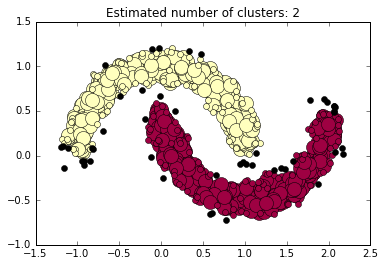

Cluster 0's health: 0.93152740906, members: 477
Cluster 1's health: 0.933313449003, members: 475
Homogeneity: 0.942
Completeness: 0.766


In [116]:
db = show_clusters(X,y, 0.1, 10)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(
        y, db.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(
        y, db.labels_))

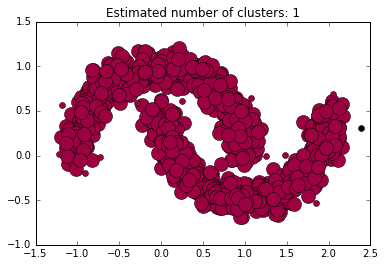

Cluster 0's health: 1.24653159434, members: 999
Homogeneity: 0.001
Completeness: 0.088


In [64]:
from sklearn import metrics
db = show_clusters(X,y, 0.2, 10)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, db.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(y, db.labels_))

# Summary of algorithms
## K-Means:

Pros:

1) Very fast, even faster with mini-batch mode

2) Very scalable to large datasets

Cons:

1) Needs to specify k

2) Resulting clusters are highly dependent on the distance metric

3) Sensitive to the initialization of initial centroids

## Agglomerative Clustering, Ward

Pros:

1) Somewhat scalable to large samples

2) Can specify 'connectivity' constraints

3) Agglomerative clustering could output a dendogram (in other libraries they could)

4) No k needed

Caveat:

1) Needs to specify neighborhood size

## DBSCAN

1) Fast and scalable to large samples

2) Uneven clusters could be found

3) No k needed

Caveat

1) Two hyperparameters to optimize, eps and min_samples

# For the rest of the session

1) Grab the previous week's speeches data

2) Make matrix X (use CountVectorizer) and vector y

3) Use DBSCAN to get each cluster (use db.labels_)

4) For each cluster, compute centroid using compute_centroids code above

5) Sort the most frequently mentioned n-grams for each cluster. These are the common platforms that time.

6) Using true labels y and their associated $x^{(i)}$, compute the dendogram for each candidate.

In [ ]:
def compute_centroids(X, candidate_grouping, k):
    m, n = X.shape
    centroids = np.zeros((k, n))
    
    for i in range(k):
        indices = np.where(candidate_grouping == i)
        centroids[i,:] = (np.sum(X[indices,:], axis=1) /
                          len(indices[0])).ravel()
    
    return centroids

In [72]:
import nltk
from nltk.corpus.reader import CategorizedPlaintextCorpusReader
sens = CategorizedPlaintextCorpusReader(
    'data/ExtractedSenatorSpeeches',
    r'.+/.*\.html', cat_pattern=r'(.+)/.*\.html')
sens.categories()
from sklearn.feature_extraction.text import CountVectorizer
tagalog_stopwords = ["mga","sina","si","ang","sila","kami", 
                     "tayo","amin","inyo","iyo",
                     "ako","akin","kayo","siya","kanila",
                     "ikaw","o","at","kung","kaya","kaya't", 
                     "saka", "ay","ng","nang"]
stopwords = nltk.corpus.stopwords.words()
all_stopwords = stopwords+tagalog_stopwords
files = [f for f in sens.fileids()]
corpus = [sens.raw(fileids=[f]) for f in files]

vectorizer = CountVectorizer(stop_words=all_stopwords, 
                             strip_accents="unicode",
                            ngram_range=(1,2),
                             max_df=0.9, min_df=0.01)

X = vectorizer.fit_transform(corpus)

In [96]:
from sklearn import cluster
db = cluster.DBSCAN(min_samples=3, eps=0.01)
db.fit(X)

DBSCAN(algorithm='auto', eps=0.01, leaf_size=30, metric='euclidean',
    min_samples=3, n_jobs=1, p=None)

In [97]:
len(np.unique(db.labels_))

5

In [117]:
X.shape

(1118, 6284)

In [116]:
len(db.labels_)

1118

In [122]:
data = X[np.where(db.labels_==0)]


In [107]:
def average_euclidean_distance3(X, labels, cat, samples=None):
    tot=0
    if not samples:
        data = X[np.where(labels==cat)]
    else:
        X = utils.shuffle(X)
        data = X[np.where(labels==cat)][:samples]
    for i in xrange(data.shape[0]-1):
        print data.shape
        tot += ((((data[i+1:]-data[i])**2).sum(1))**.5).sum()
    avg = tot/((data.shape[0]-1)*(data.shape[0])/2.)
    return avg